# MNIST Classifier with Multilayer Perceptron (MLP)

João Vitor de Paiva Marcotti

Electrical Engineer - State University of Maringá - UEM (Brazil)

8th Semester Economics Student - Cesumar University - UniCesumar (Brazil)

Open to Work

Contact: joaovmarcotti@hotmail.com



In [48]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

In [49]:
# Splits the dataset into train and test images and identifications
(images_train, identifications_train),(images_test, identifications_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

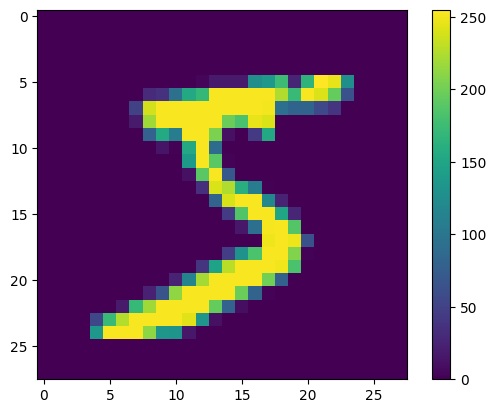

In [50]:
# Shows the first image inside the images_train dataset
plt.imshow(images_train[0])
plt.colorbar()

In [51]:
# Shows the first label inside the identifications_train dataset
identifications_train[0]

5

In [52]:
# Reduces the images train and test color scale
images_train = images_train / float(255)
images_test = images_test / float(255)

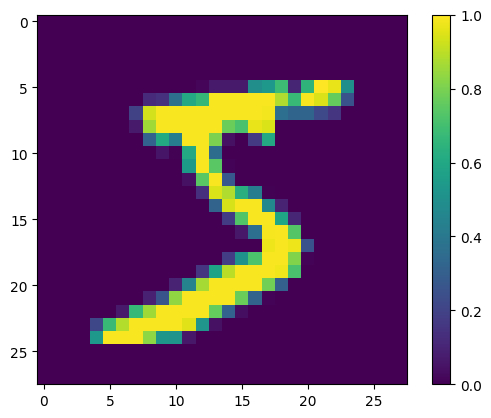

In [53]:
# Shows the first image inside the images_train dataset
plt.imshow(images_train[0])
plt.colorbar()

In [54]:
# Creates the MLP with 2 hidden layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)])

# Sets the Adam optimizer learning rate as 0.002
adam = keras.optimizers.Adam(learning_rate=0.002)

# Sets an early stopping according to the val_loss
early_stopping = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                  keras.callbacks.ModelCheckpoint(filepath='best_model.hd5',
                                                  monitor='val_loss',
                                                  save_best_only=True)]

In [55]:
# Compiles the model
model.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [56]:
# Trains the model
record = model.fit(images_train, identifications_train, epochs=10,
                       batch_size=128, validation_split=0.2,
                       callbacks=early_stopping)

Epoch 1/10
374/375 [============================>.] - ETA: 0s - loss: 0.2956 - accuracy: 0.9095

375/375 [==============================] - 6s 14ms/step - loss: 0.2951 - accuracy: 0.9096 - val_loss: 0.1458 - val_accuracy: 0.9546
Epoch 2/10
372/375 [============================>.] - ETA: 0s - loss: 0.1267 - accuracy: 0.9608

375/375 [==============================] - 5s 13ms/step - loss: 0.1262 - accuracy: 0.9610 - val_loss: 0.1061 - val_accuracy: 0.9665
Epoch 3/10
374/375 [============================>.] - ETA: 0s - loss: 0.0966 - accuracy: 0.9695

375/375 [==============================] - 5s 12ms/step - loss: 0.0966 - accuracy: 0.9695 - val_loss: 0.0946 - val_accuracy: 0.9712
Epoch 4/10
370/375 [============================>.] - ETA: 0s - loss: 0.0782 - accuracy: 0.9751

375/375 [==============================] - 6s 15ms/step - loss: 0.0781 - accuracy: 0.9751 - val_loss: 0.0887 - val_accuracy: 0.9732
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0677 - accuracy: 0.9782 - val_loss: 0.0955 - val_accuracy: 0.9722


In [57]:
# Evaluates the trained model using the test datasets
test_loss, test_accuracy = model.evaluate(images_test, identifications_test)
print('Test loss', test_loss)
print('Test accuracy', test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0815 - accuracy: 0.9759
Test loss 0.0815156027674675
Test accuracy 0.9758999943733215


In [58]:
# Shows the model summary
model_summary = model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-tr

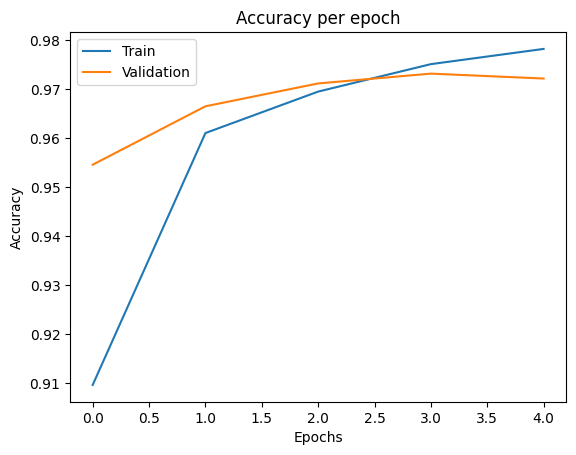

In [59]:
# Plots the model's accuracy during train and validation per epoch
plt.plot(record.history['accuracy'])
plt.plot(record.history['val_accuracy'])
plt.title('Accuracy per epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])

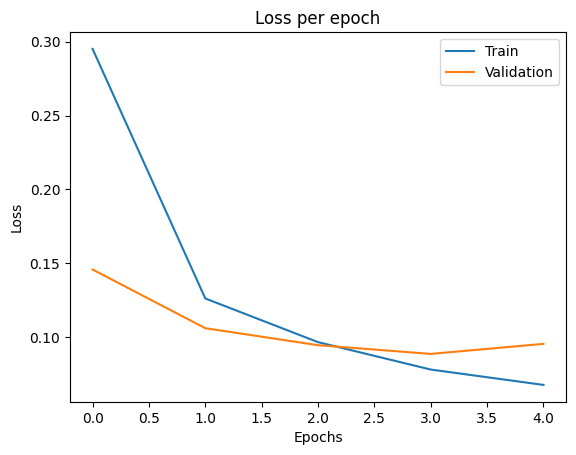

In [60]:
# Plots the model's loss train and validation per epoch
plt.plot(record.history['loss'])
plt.plot(record.history['val_loss'])
plt.title('Loss per epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])

In [62]:
# Saves the model
model.save('MNIST_MLP.h5')

In [63]:
# Loads the saved model
saved_model = load_model('MNIST_MLP.h5')

In [65]:
# Shows the saved model result to an specific image
saved_model_test = saved_model.predict(images_test)
print('Saved model result:', np.argmax(saved_model_test[1]))
print('Image identification:', identifications_test[1])

313/313 [==============================] - 1s 2ms/step
Saved model result: 2
Image identification: 2
